**This Compares results from docking to known actives and inactives**

### Importing Files

In [62]:
import pandas as pd
path_active= 'docking_results_ranked_actives.csv'
path_inactive= 'docking_results_ranked_inactives.csv'
path_docked_1m = 'docking_results_ranked_1m.csv'
path_docked = '43k_docked.csv'
path_decoys = 'docking_results_ranked_decoys.csv'
actives = pd.read_csv(path_active)
inactives = pd.read_csv(path_inactive)
docked = pd.read_csv(path_docked)
decoys = pd.read_csv(path_decoys)
docked_1m = pd.read_csv(path_docked_1m)

In [63]:
# column names
print(docked.columns)

Index(['Rank', 'Compound', 'SMILES', 'Affinity_kcal_per_mol', 'DLG_file',
       'Within_Pocket'],
      dtype='object')


### Filter outside the box

In [64]:
before = len(actives)
actives = actives[actives['Within_Pocket'] == True]
after = len(actives)
print(f"Number of actives before: {before}, after: {after}")

before = len(inactives)
inactives = inactives[inactives['Within_Pocket'] == True]
after = len(inactives)
print(f"Number of inactives before: {before}, after: {after}")

before = len(docked)
docked = docked[docked['Within_Pocket'] == True]
after = len(docked)
print(f"Number of docked before: {before}, after: {after}")
before = len(decoys)
decoys = decoys[decoys['Within_Pocket'] == True]
after = len(decoys)
print(f"Number of decoys before: {before}, after: {after}")

Number of actives before: 36, after: 33
Number of inactives before: 19, after: 19
Number of docked before: 43274, after: 34863
Number of decoys before: 400, after: 389


### Comparing Data

In [65]:
def calculate_energy_statistics(df):
    """
    Calculate the mean, median, min, max and standard deviation of the docking scores.
    """
    mean_score = df['Affinity_kcal_per_mol'].mean()
    median_score = df['Affinity_kcal_per_mol'].median()
    min_score = df['Affinity_kcal_per_mol'].min()
    max_score = df['Affinity_kcal_per_mol'].max()
    std_score = df['Affinity_kcal_per_mol'].std()
    return {
        'mean': mean_score,
        'median': median_score,
        'min': min_score,
        'max': max_score,
        'std': std_score
    }
top_100_docked = docked.head(100)
stat_docked_top_100 = calculate_energy_statistics(top_100_docked)
stat_actives = calculate_energy_statistics(actives)
stat_inactives = calculate_energy_statistics(inactives)
print("Docked Statistics (Top 100):")
print(stat_docked_top_100)
print("\nActives Statistics:")
print(stat_actives)
print("\nInactives Statistics:")
print(stat_inactives)


Docked Statistics (Top 100):
{'mean': -10.796599999999996, 'median': -10.745000000000001, 'min': -11.53, 'max': -10.57, 'std': 0.18128731590790037}

Actives Statistics:
{'mean': -9.17090909090909, 'median': -9.23, 'min': -10.49, 'max': -8.19, 'std': 0.653439762125992}

Inactives Statistics:
{'mean': -8.397894736842106, 'median': -8.42, 'min': -9.92, 'max': -6.43, 'std': 0.9129596495121933}


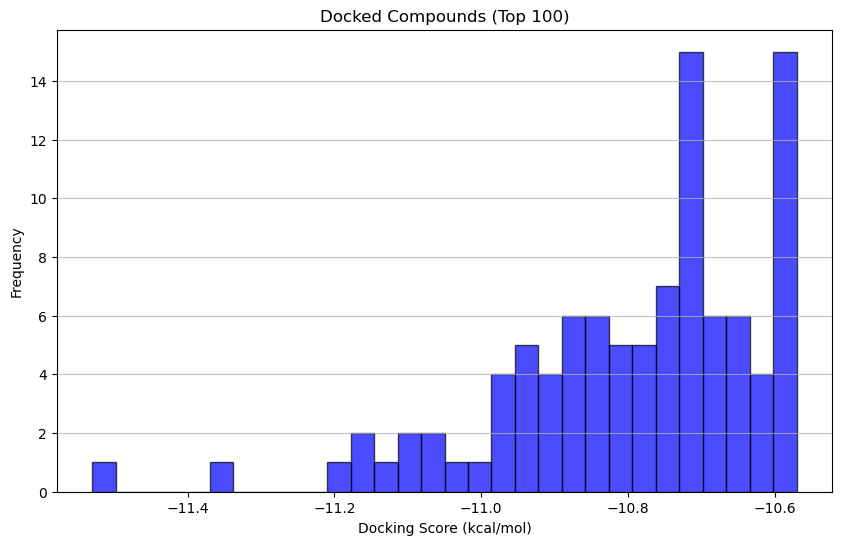

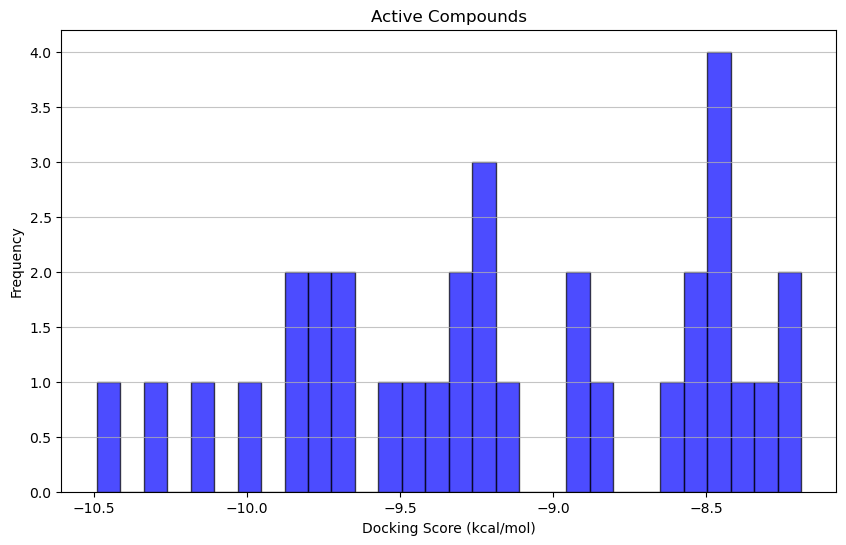

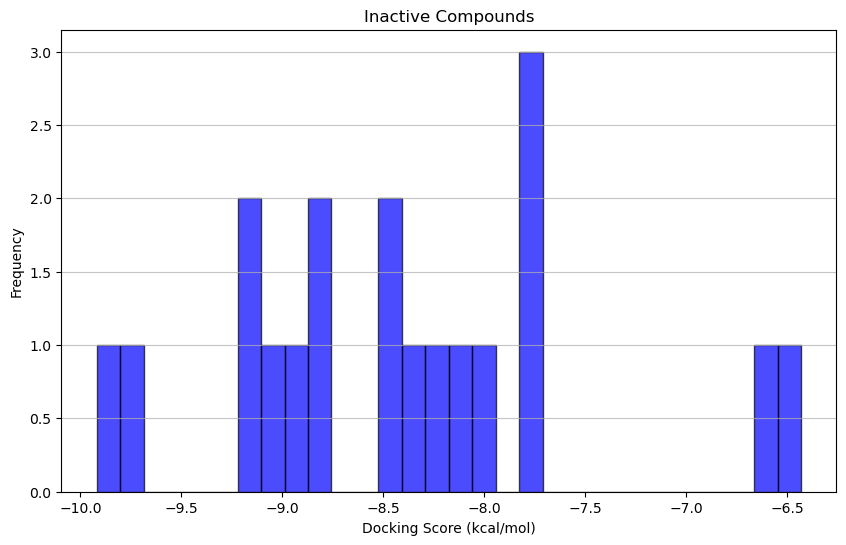

In [66]:
# Visualize Scores
import matplotlib.pyplot as plt
def plot_scores(df, title):
    """
    Plot the docking scores as a histogram.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(df['Affinity_kcal_per_mol'], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Docking Score (kcal/mol)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
plot_scores(top_100_docked, 'Docked Compounds (Top 100)')
plot_scores(actives, 'Active Compounds')
plot_scores(inactives, 'Inactive Compounds')

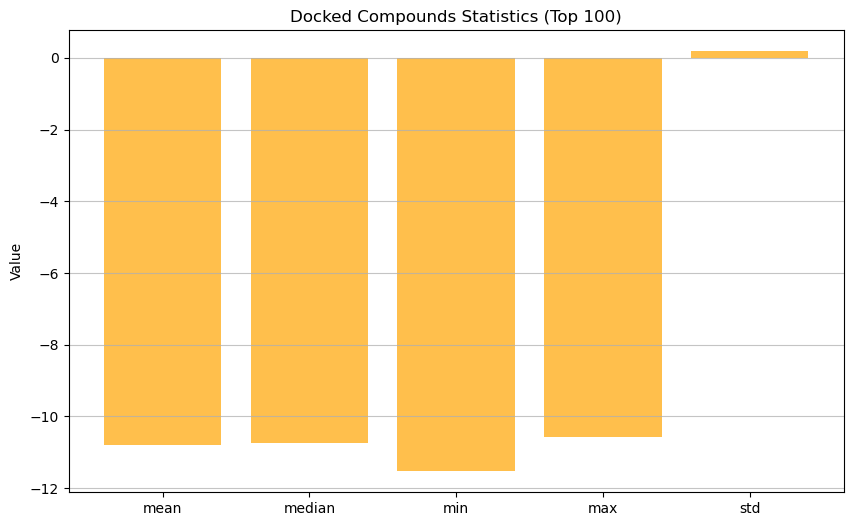

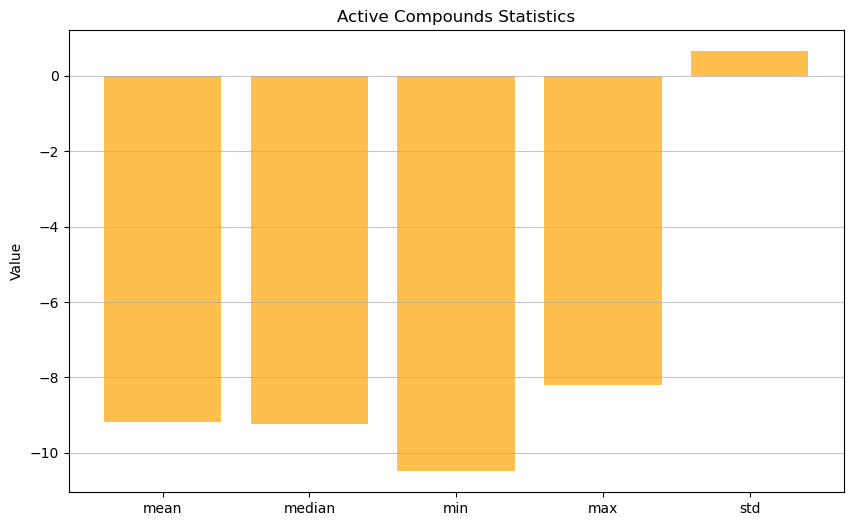

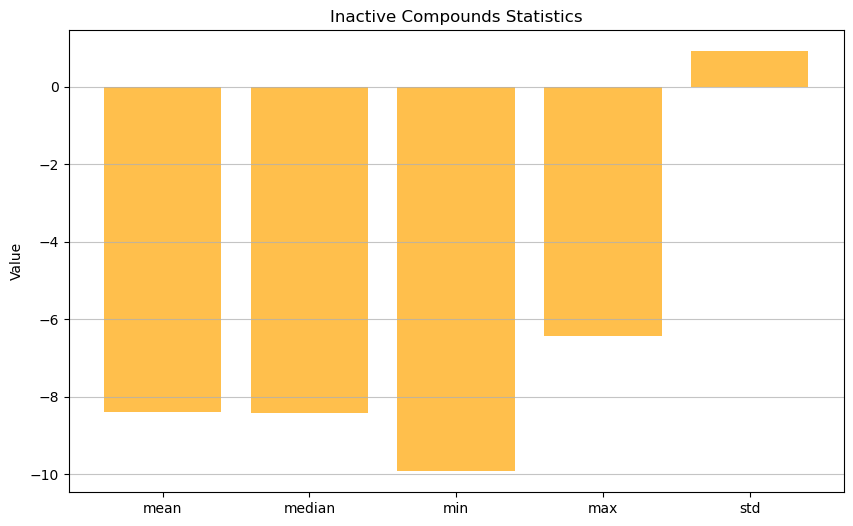

In [67]:
# Visualize Statistics
def plot_statistics(statistics, title):
    """
    Plot the statistics as a bar chart.
    """
    labels = list(statistics.keys())
    values = list(statistics.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='orange', alpha=0.7)
    plt.title(title)
    plt.ylabel('Value')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
plot_statistics(stat_docked_top_100, 'Docked Compounds Statistics (Top 100)')
plot_statistics(stat_actives, 'Active Compounds Statistics')
plot_statistics(stat_inactives, 'Inactive Compounds Statistics')

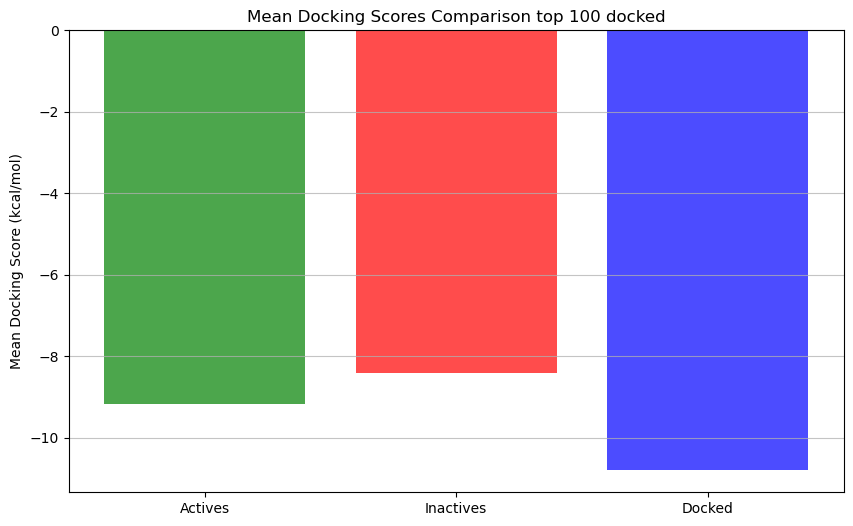

In [68]:
# visualzie mean for actives and inactives and docked
def plot_mean_comparison(actives_mean, inactives_mean, docked_mean, title):
    """
    Plot the mean docking scores for actives, inactives, and docked compounds.
    """
    means = [actives_mean, inactives_mean, docked_mean]
    labels = ['Actives', 'Inactives', 'Docked']
    title = title if title else 'Mean Docking Scores Comparison'
    plt.figure(figsize=(10, 6))
    plt.bar(labels, means, color=['green', 'red', 'blue'], alpha=0.7)
    plt.title(title)
    plt.ylabel('Mean Docking Score (kcal/mol)')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
actives_mean = stat_actives['mean']
inactives_mean = stat_inactives['mean']
docked_mean_top_100 = stat_docked_top_100['mean']
plot_mean_comparison(actives_mean, inactives_mean, docked_mean_top_100, title = 'Mean Docking Scores Comparison top 100 docked') 


Docked Statistics (Top 1000):
{'mean': -10.13524, 'median': -10.06, 'min': -11.53, 'max': -9.79, 'std': 0.2942807223444029}


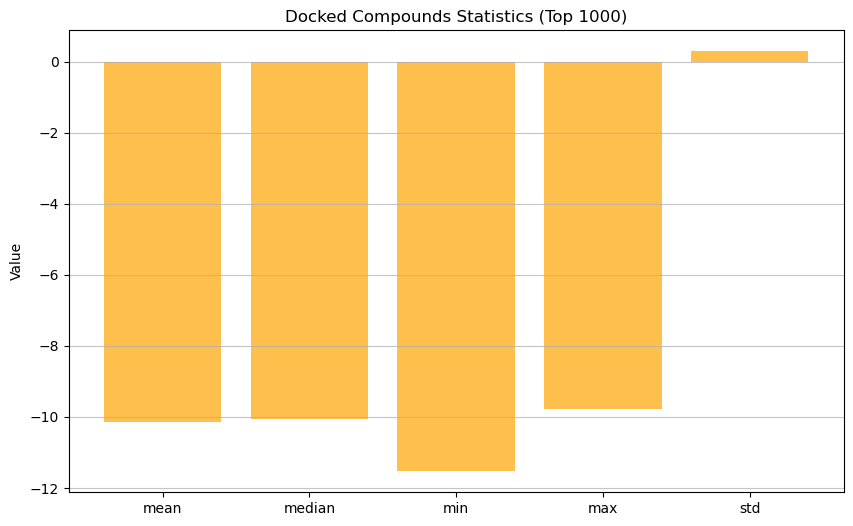

In [69]:
top_1k_docked = docked.head(1000)
stat_top_1k_docked = calculate_energy_statistics(top_1k_docked)
print("\nDocked Statistics (Top 1000):")
print(stat_top_1k_docked)
plot_statistics(stat_top_1k_docked, 'Docked Compounds Statistics (Top 1000)')

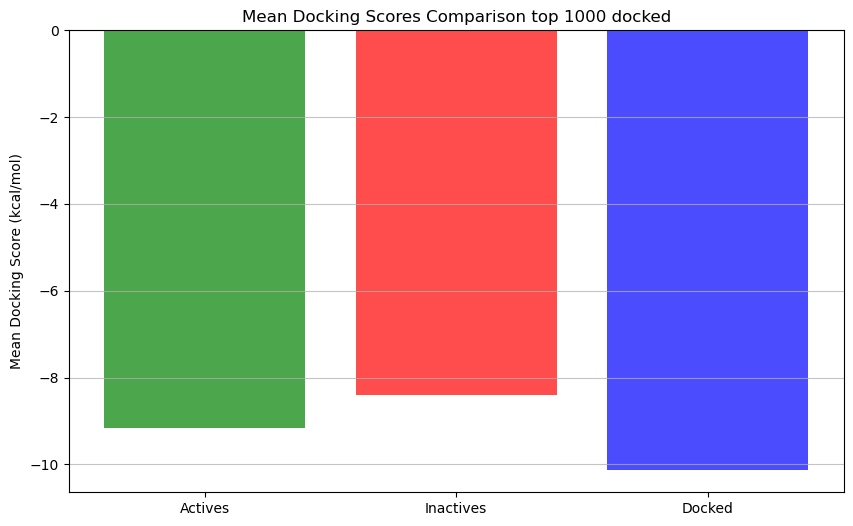

In [70]:
docked_1k_mean = stat_top_1k_docked['mean']
plot_mean_comparison(actives_mean, inactives_mean, docked_1k_mean, title='Mean Docking Scores Comparison top 1000 docked')


Docked Statistics (Bottom 1000):
{'mean': -5.46593, 'median': -5.555, 'min': -5.85, 'max': -4.22, 'std': 0.3161371186333199}


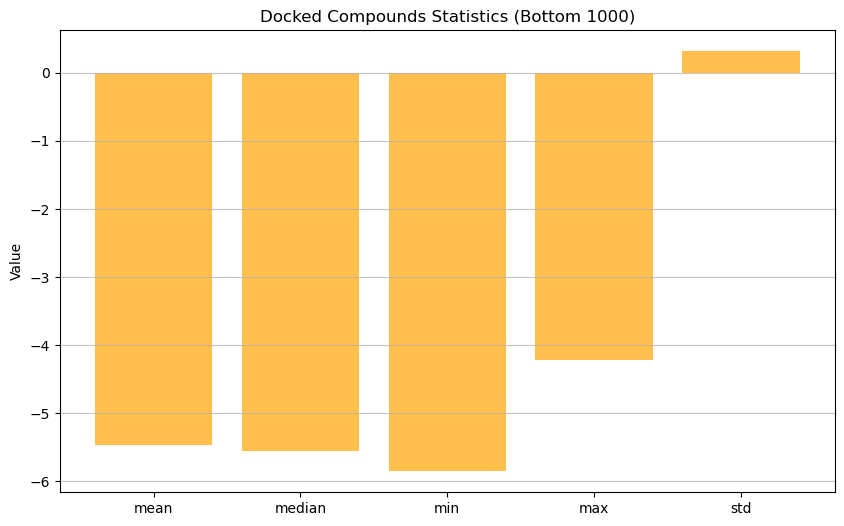

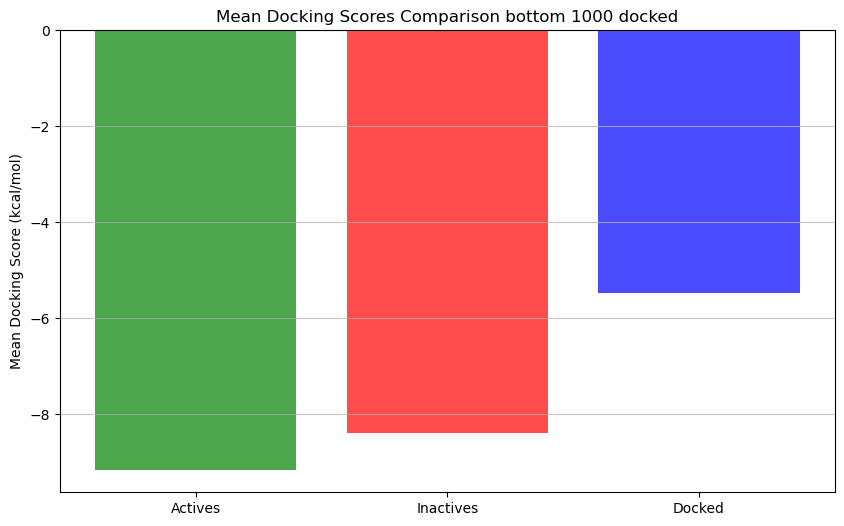

In [71]:
docked_bottom_1k = docked.tail(1000)
stat_bottom_1k_docked = calculate_energy_statistics(docked_bottom_1k)
print("\nDocked Statistics (Bottom 1000):")
print(stat_bottom_1k_docked)
plot_statistics(stat_bottom_1k_docked, 'Docked Compounds Statistics (Bottom 1000)') 
docked_bottom_1k_mean = stat_bottom_1k_docked['mean']
plot_mean_comparison(actives_mean, inactives_mean, docked_bottom_1k_mean, title='Mean Docking Scores Comparison bottom 1000 docked')


Overall Docked Mean Score:
-7.886773083211428


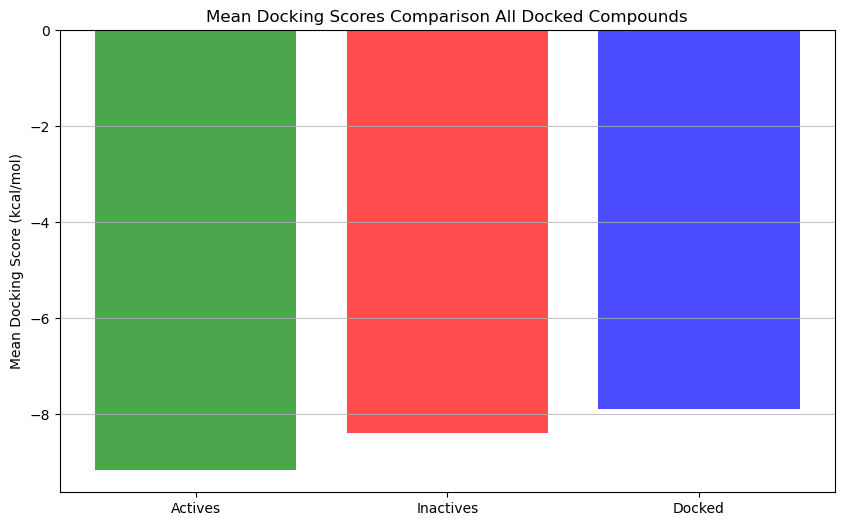

In [72]:
all_docked = docked['Affinity_kcal_per_mol']
all_docked_mean = all_docked.mean()
print("\nOverall Docked Mean Score:")   
print(all_docked_mean)
plot_mean_comparison(actives_mean, inactives_mean, all_docked_mean, title='Mean Docking Scores Comparison All Docked Compounds')


Decoys Statistics:
{'mean': -6.858380462724935, 'median': -6.83, 'min': -9.94, 'max': -3.26, 'std': 1.0592409747096783}


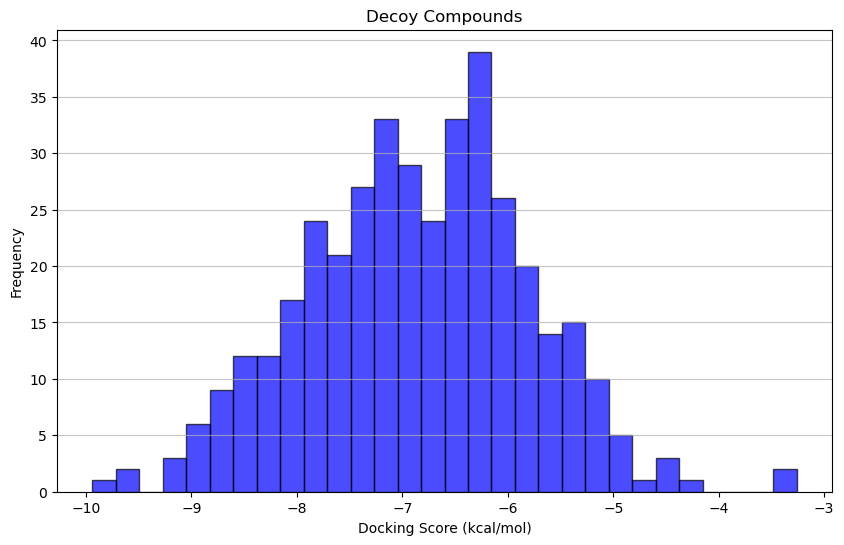

In [73]:
# decoys data
path_decoys = 'docking_results_ranked_decoys.csv'
decoys = pd.read_csv(path_decoys)
# Filter decoys within the pocket
decoys = decoys[decoys['Within_Pocket'] == True]
# Calculate statistics for decoys
stat_decoys = calculate_energy_statistics(decoys)
print("\nDecoys Statistics:")
print(stat_decoys)
# Visualize Decoys Scores
plot_scores(decoys, 'Decoy Compounds')
# Visualize Decoys Statistics

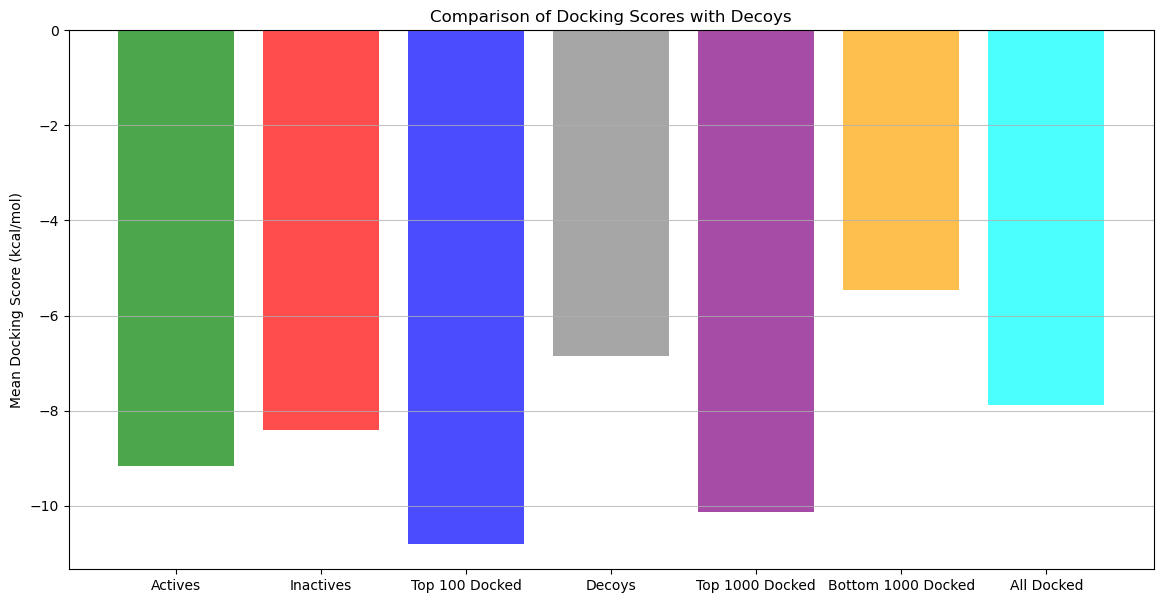

In [74]:
def compare_all_scores_mean(actives, inactives, top_100, top_1k, bottom_1k, all_docked, decoys=None):
    """
    Compare the docking scores of actives, inactives, top 100 docked, top 1000 docked, bottom 1000 docked, all docked compounds, and decoys (as 4th column if provided).
    """
    means = [
        actives['Affinity_kcal_per_mol'].mean(),
        inactives['Affinity_kcal_per_mol'].mean(),
        top_100['Affinity_kcal_per_mol'].mean(),
    ]
    labels = ['Actives', 'Inactives', 'Top 100 Docked']
    colors = ['green', 'red', 'blue']

    if decoys is not None:
        means.append(decoys['Affinity_kcal_per_mol'].mean())
        labels.append('Decoys')
        colors.append('grey')

    means += [
        top_1k['Affinity_kcal_per_mol'].mean(),
        bottom_1k['Affinity_kcal_per_mol'].mean(),
        all_docked.mean()
    ]
    labels += ['Top 1000 Docked', 'Bottom 1000 Docked', 'All Docked']
    colors += ['purple', 'orange', 'cyan']

    plt.figure(figsize=(14, 7))
    plt.bar(labels, means, color=colors, alpha=0.7)
    plt.title('Comparison of Docking Scores' + (' with Decoys' if decoys is not None else ''))
    plt.ylabel('Mean Docking Score (kcal/mol)')
    plt.grid(axis='y', alpha=0.75)
    plt.show()       
    
compare_all_scores_mean(actives, inactives, top_100_docked, top_1k_docked, docked_bottom_1k, all_docked, decoys=decoys)


### Find top 100 ligands that are closer to the mean of the actives

In [75]:
def find_top_n_closest_to_actives(docked_df, actives_mean, n=100):
    """
    Find the top n compounds from docked_df whose Affinity_kcal_per_mol scores are closest to actives_mean.
    Returns a DataFrame of the top n closest compounds.
    """
    docked_df = docked_df.copy()
    docked_df['distance_to_actives_mean'] = (docked_df['Affinity_kcal_per_mol'] - actives_mean).abs()
    closest_n = docked_df.nsmallest(n, 'distance_to_actives_mean').drop(columns=['distance_to_actives_mean'])
    return closest_n

top_100_closest_to_actives = find_top_n_closest_to_actives(docked, actives_mean, n=100)
top_100_closest_to_actives.head()
top_100_closest_to_actives.to_csv('closest_100_to_actives.csv', index=False)

### Calculate EF1%

In [76]:
# Combine actives, inactives, and decoys into one DataFrame with labels
actives_labeled = actives.copy()
actives_labeled['Label'] = 'Active'

inactives_labeled = inactives.copy()
inactives_labeled['Label'] = 'Inactive'

decoys_labeled = decoys.copy()
decoys_labeled['Label'] = 'Decoy'

docked_labeled = docked.copy()
docked_labeled['Label'] = 'Docked'
combined_validation = pd.concat([actives_labeled, inactives_labeled, decoys_labeled], ignore_index=True)
combined_total = pd.concat([actives_labeled, inactives_labeled, decoys_labeled, docked_labeled], ignore_index=True)
# Rank by absolute binding energy (Affinity_kcal_per_mol, most negative is strongest)
combined_total = combined_total.sort_values(by='Affinity_kcal_per_mol').reset_index(drop=True)
combined_total['Absolute_Rank'] = combined_total['Affinity_kcal_per_mol'].rank(method='min', ascending=True).astype(int)
combined_validation = combined_validation.sort_values(by='Affinity_kcal_per_mol').reset_index(drop=True)
combined_validation['Absolute_Rank'] = combined_validation['Affinity_kcal_per_mol'].rank(method='min', ascending=True).astype(int)
print(f'length of combined_total: {len(combined_total)}')
print (f'length of combined_validation: {len(combined_validation)}')
combined_validation.head()


length of combined_total: 35304
length of combined_validation: 441


,Rank,Compound,SMILES,Affinity_kcal_per_mol,DLG_file,Within_Pocket,Label,Absolute_Rank
0,1,Cmpd_50_Kd_766nM_IC50_NA__docked,Brc1cccc([C@@H]2C[C@H](c3ccccc3I)n3nnnc3N2)c1,-10.49,Cmpd_50_Kd_766nM_IC50_NA__docked.dlg,True,Active,1
1,2,Cmpd_52_IC50_314nM_docked,Brc1cccc([C@@H]2C[C@H](c3ccccc3Br)n3nnnc3N2)c1,-10.31,Cmpd_52_IC50_314nM_docked.dlg,True,Active,2
2,3,Cmpd_59_IC50_87nM_docked,Clc1ccc(Br)cc1[C@@H]1C[C@@H](c2cccc(Br)c2)Nc2n...,-10.13,Cmpd_59_IC50_87nM_docked.dlg,True,Active,3
3,4,Cmpd_70_SPA_IC50_0_16uM_docked,CS(=O)(=O)c1ccc(Oc2cc(F)cc(C#N)c2)c2c1[C@H](O)CC2,-9.96,Cmpd_70_SPA_IC50_0_16uM_docked.dlg,True,Active,4
4,1,ZINC000000000217_docked,NaN,-9.94,ZINC000000000217_docked.dlg,True,Decoy,5


In [77]:
actives.head(30)

,Rank,Compound,SMILES,Affinity_kcal_per_mol,DLG_file,Within_Pocket
0,1,Cmpd_50_Kd_766nM_IC50_NA__docked,Brc1cccc([C@@H]2C[C@H](c3ccccc3I)n3nnnc3N2)c1,-10.49,Cmpd_50_Kd_766nM_IC50_NA__docked.dlg,True
1,2,Cmpd_52_IC50_314nM_docked,Brc1cccc([C@@H]2C[C@H](c3ccccc3Br)n3nnnc3N2)c1,-10.31,Cmpd_52_IC50_314nM_docked.dlg,True
2,3,Cmpd_59_IC50_87nM_docked,Clc1ccc(Br)cc1[C@@H]1C[C@@H](c2cccc(Br)c2)Nc2n...,-10.13,Cmpd_59_IC50_87nM_docked.dlg,True
3,4,Cmpd_70_SPA_IC50_0_16uM_docked,CS(=O)(=O)c1ccc(Oc2cc(F)cc(C#N)c2)c2c1[C@H](O)CC2,-9.96,Cmpd_70_SPA_IC50_0_16uM_docked.dlg,True
4,5,PT2385_S19_variant_IC50_0_012uM_docked,CS(=O)(=O)c1ccc(Oc2cc(F)cc(C#N)c2)c2c1[C@H](O)...,-9.84,PT2385_S19_variant_IC50_0_012uM_docked.dlg,True
5,6,Cmpd_53_IC50_195nM_docked,Clc1ccccc1[C@@H]1C[C@@H](c2cccc(Br)c2)Nc2nnnn21,-9.82,Cmpd_53_IC50_195nM_docked.dlg,True
6,7,Cmpd_71_SPA_IC50_0_041uM_docked,CS(=O)(=O)c1ccc(Oc2cc(F)cc(C#N)c2)c2c1[C@H](O)...,-9.78,Cmpd_71_SPA_IC50_0_041uM_docked.dlg,True
7,8,Cmpd_64_Kd_194nM_IC50_NA__docked,Fc1c(Cl)ccc(Cl)c1[C@@H]1C[C@@H](c2cccc(Br)c2)N...,-9.74,Cmpd_64_Kd_194nM_IC50_NA__docked.dlg,True
8,9,PT_2385_IC50_0_012uM_docked,CS(=O)(=O)C1=C2[C@H](O)C(F)(F)CC2=C(OC2=CC(=CC...,-9.72,PT_2385_IC50_0_012uM_docked.dlg,True
9,10,PT_2977_IC50_0_009uM_docked,CS(=O)(=O)c1ccc(Oc2cc(F)cc(C#N)c2)c2c1[C@H](O)...,-9.71,PT_2977_IC50_0_009uM_docked.dlg,True


In [78]:
def calculate_ef_percent(combined_validation, label='Active', percent=1):
    """
    Calculate the Enrichment Factor at a given percent (e.g., EF1%, EF10%) for the given label in the ranked combined_df.
    """
    n_total = len(combined_validation)
    n_label = (combined_validation['Label'] == label).sum()
    top_n = int(n_total * percent / 100)
    if top_n == 0:
        top_n = 1  # Ensure at least one compound is considered

    top_df = combined_validation.head(top_n)
    n_label_in_top = (top_df['Label'] == label).sum()

    ef = (n_label_in_top / top_n) / (n_label / n_total)
    print(f"EF{percent}% for {label}: {ef:.2f}")
    print(f"Top {percent}% = {top_n} compounds, {n_label_in_top} are {label} (total {n_label} {label} in dataset)")
    return ef, top_df

ef1_active_validation, top1_df_validation = calculate_ef_percent(combined_validation, label='Active', percent=1)
ef10_active_validation, top10_df_validation = calculate_ef_percent(combined_validation, label='Active', percent=10)

EF1% for Active: 13.36
Top 1% = 4 compounds, 4 are Active (total 33 Active in dataset)
EF10% for Active: 6.68
Top 10% = 44 compounds, 22 are Active (total 33 Active in dataset)


### Calculating EF1% and EF10% for total dataset

In [79]:
ef1_active_total, top1_df_total = calculate_ef_percent(combined_total, label='Active', percent=1)
ef10_active_total, top10_df_total = calculate_ef_percent(combined_total, label='Active', percent=10)

EF1% for Active: 6.06
Top 1% = 353 compounds, 2 are Active (total 33 Active in dataset)
EF10% for Active: 5.46
Top 10% = 3530 compounds, 18 are Active (total 33 Active in dataset)


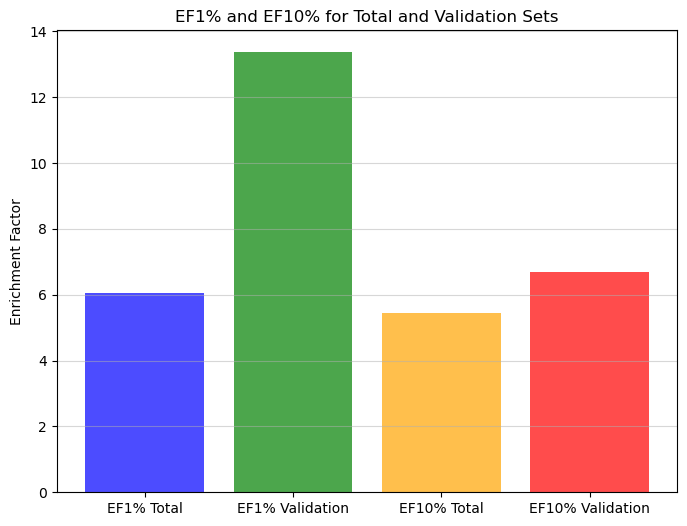

In [80]:
import matplotlib.pyplot as plt

labels = ['EF1% Total', 'EF1% Validation', 'EF10% Total', 'EF10% Validation']
values = [ef1_active_total, ef1_active_validation, ef10_active_total, ef10_active_validation]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)
plt.ylabel('Enrichment Factor')
plt.title('EF1% and EF10% for Total and Validation Sets')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [81]:
len(top10_df_total)

3530

In [82]:
top10_df_total.to_csv('top_10_percent_total.csv', index=False)

### Key Analysis

Standard Deviation (from existing stats):
Actives Std: 0.65
Inactives Std: 0.91
Decoys Std: 1.06
Top 100 Docked Std: 0.18
Top 1k Docked Std: 0.29
Bottom 1k Docked Std: 0.32
All Docked Std: 1.04

Standard Error of the Mean (SEM):
Actives SEM: 0.114
Inactives SEM: 0.209
Decoys SEM: 0.054
Top 100 Docked SEM: 0.018
Top 1k Docked SEM: 0.009
Bottom 1k Docked SEM: 0.010
All Docked SEM: 0.006



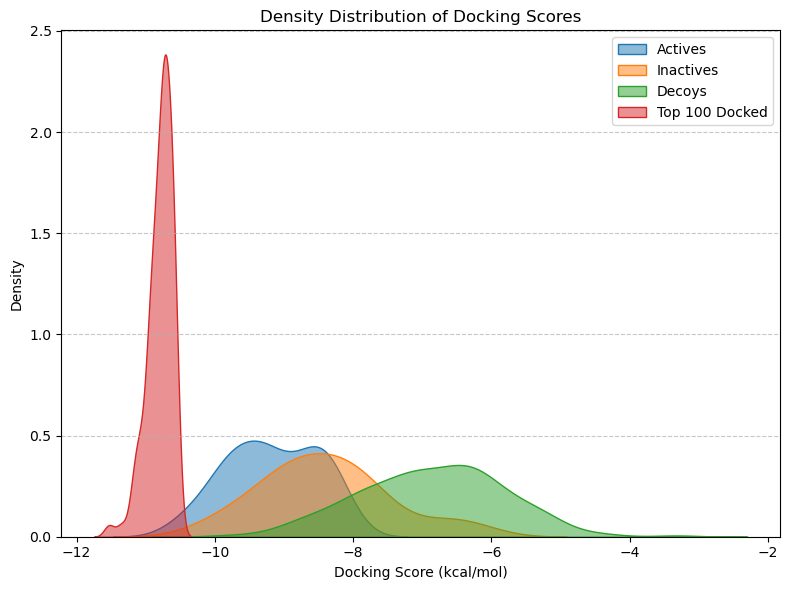

In [114]:
import numpy as np
import seaborn as sns

# Function to calculate Standard Error of the Mean (SEM)
def calculate_sem(df_column):
    return df_column.std() / np.sqrt(len(df_column))

# Calculate SEM for all groups
sem_actives = calculate_sem(actives['Affinity_kcal_per_mol'])
sem_inactives = calculate_sem(inactives['Affinity_kcal_per_mol'])
sem_top_100_docked = calculate_sem(top_100_docked['Affinity_kcal_per_mol'])
sem_top_1k_docked = calculate_sem(top_1k_docked['Affinity_kcal_per_mol'])
sem_bottom_1k_docked = calculate_sem(docked_bottom_1k['Affinity_kcal_per_mol'])
sem_all_docked = calculate_sem(docked['Affinity_kcal_per_mol'])
sem_decoys = calculate_sem(decoys['Affinity_kcal_per_mol'])

print("Standard Deviation (from existing stats):")
print(f"Actives Std: {stat_actives['std']:.2f}")
print(f"Inactives Std: {stat_inactives['std']:.2f}")
print(f"Decoys Std: {stat_decoys['std']:.2f}")
print(f"Top 100 Docked Std: {stat_docked_top_100['std']:.2f}")
print(f"Top 1k Docked Std: {stat_top_1k_docked['std']:.2f}")
print(f"Bottom 1k Docked Std: {stat_bottom_1k_docked['std']:.2f}")
print(f"All Docked Std: {docked['Affinity_kcal_per_mol'].std():.2f}\n")


print("Standard Error of the Mean (SEM):")
print(f"Actives SEM: {sem_actives:.3f}")
print(f"Inactives SEM: {sem_inactives:.3f}")
print(f"Decoys SEM: {sem_decoys:.3f}")
print(f"Top 100 Docked SEM: {sem_top_100_docked:.3f}")
print(f"Top 1k Docked SEM: {sem_top_1k_docked:.3f}")
print(f"Bottom 1k Docked SEM: {sem_bottom_1k_docked:.3f}")
print(f"All Docked SEM: {sem_all_docked:.3f}\n")

# Prepare data for box plot
plot_data = [
    actives['Affinity_kcal_per_mol'],
    inactives['Affinity_kcal_per_mol'],
    decoys['Affinity_kcal_per_mol'],
    top_100_docked['Affinity_kcal_per_mol'],
    top_1k_docked['Affinity_kcal_per_mol'],
    docked_bottom_1k['Affinity_kcal_per_mol'],
    docked['Affinity_kcal_per_mol'] 
]
plot_labels = [
    'Actives', 
    'Inactives', 
    'Decoys',
    'Top 100 Docked', 
    'Top 1k Docked', 
    'Bottom 1k Docked',
    'All Docked'
]



# Density plots for a different view of distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(actives['Affinity_kcal_per_mol'], label='Actives', fill=True, alpha=0.5)
sns.kdeplot(inactives['Affinity_kcal_per_mol'], label='Inactives', fill=True, alpha=0.5)
sns.kdeplot(decoys['Affinity_kcal_per_mol'], label='Decoys', fill=True, alpha=0.5)
sns.kdeplot(top_100_docked['Affinity_kcal_per_mol'], label='Top 100 Docked', fill=True, alpha=0.5)
# sns.kdeplot(top_1k_docked['Affinity_kcal_per_mol'], label='Top 1k Docked', fill=True, alpha=0.3) # Can be noisy with many overlaps
# sns.kdeplot(docked['Affinity_kcal_per_mol'], label='All Docked', fill=True, alpha=0.3) # Can be noisy

plt.title('Density Distribution of Docking Scores')
plt.xlabel('Docking Score (kcal/mol)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

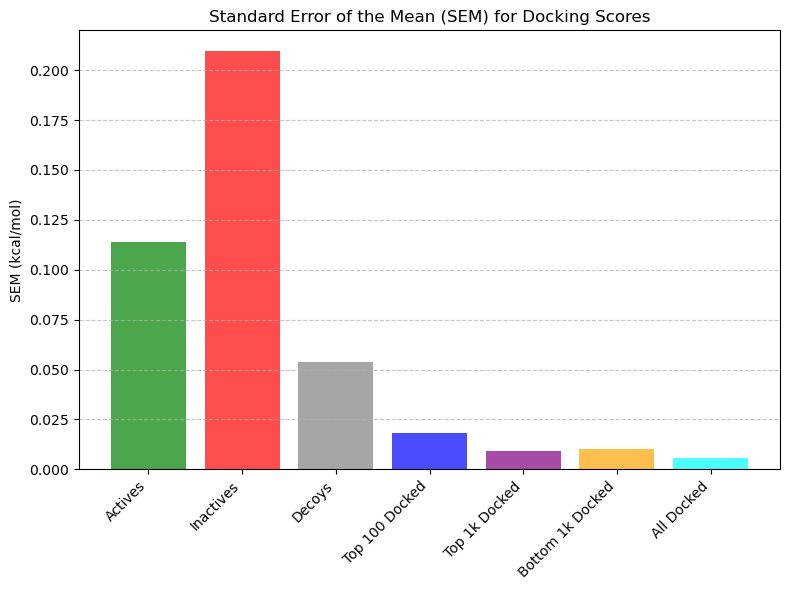

In [84]:
# Prepare data for SEM bar plot
sem_values = [
    sem_actives,
    sem_inactives,
    sem_decoys,
    sem_top_100_docked,
    sem_top_1k_docked,
    sem_bottom_1k_docked,
    sem_all_docked
]

# Create SEM bar plot
plt.figure(figsize=(8, 6))
plt.bar(plot_labels, sem_values, color=['green', 'red', 'grey', 'blue', 'purple', 'orange', 'cyan'], alpha=0.7)
plt.title('Standard Error of the Mean (SEM) for Docking Scores')
plt.ylabel('SEM (kcal/mol)')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


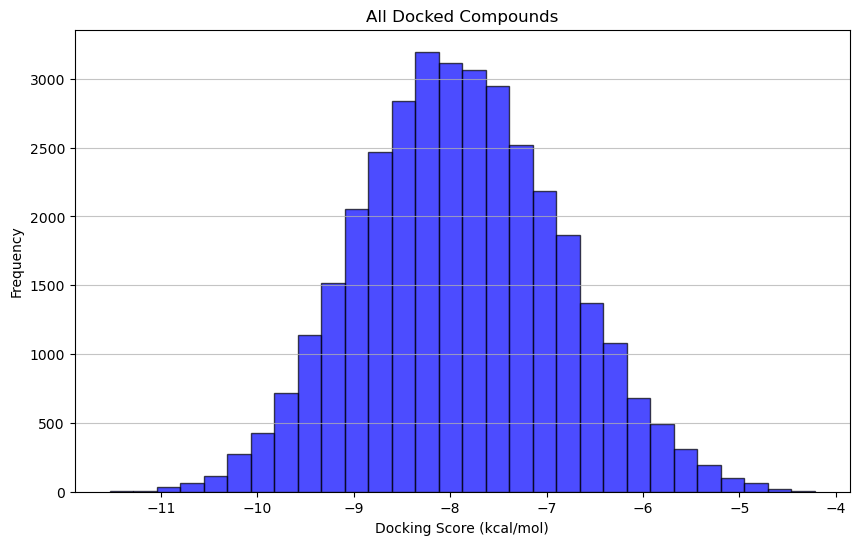

In [85]:
plot_scores(docked, 'All Docked Compounds')

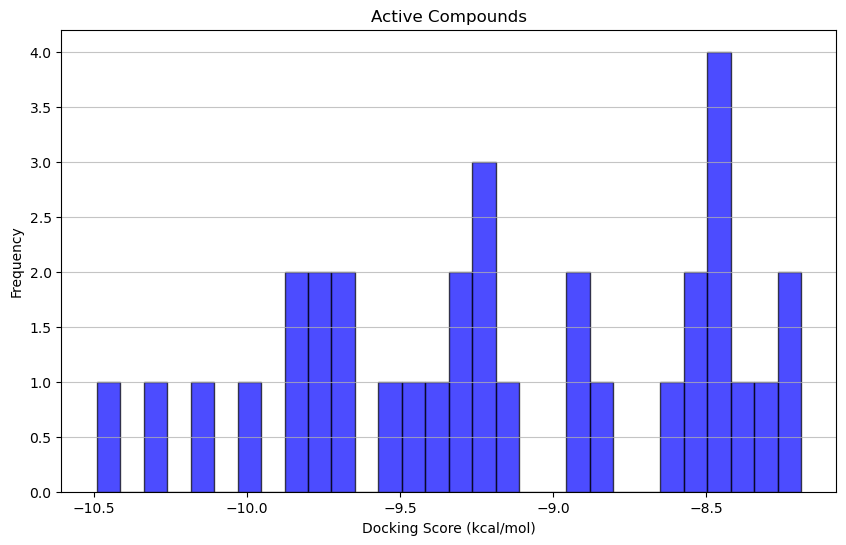

In [86]:
plot_scores(actives, 'Active Compounds')

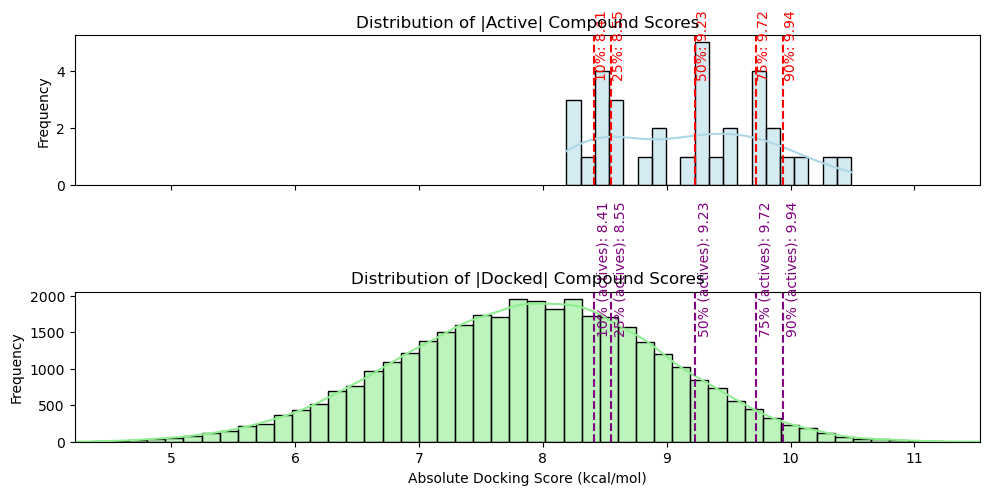

In [87]:

# --- prepare the two data vectors (absolute values) ---
data1 = actives['Affinity_kcal_per_mol'].abs()
data2 = docked['Affinity_kcal_per_mol'].abs()

# determine common x‐axis limits
x_min, x_max = data2.min(), data2.max()

# compute percentiles of data1 only
pct1 = np.percentile(data1, [10, 25, 50, 75, 90])

# --- 2. Create the Plot ---
fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

# --- Plot 1: Actives (abs) ---
ax1 = axes[0]
sns.histplot(data1, bins=20, kde=True, ax=ax1, color="lightblue", edgecolor="black")
ax1.set_title('Distribution of |Active| Compound Scores')
ax1.set_ylabel('Frequency')
ax1.set_xlim(x_min, x_max)

# draw data1 percentiles on ax1
ypos1 = ax1.get_ylim()[1] * 0.7
for p, v in zip([10,25,50,75,90], pct1):
    ax1.axvline(v, color='red', ls='--')
    ax1.text(v + 0.01, ypos1, f'{p}%: {v:.2f}', rotation=90, color='red', va='bottom')

# --- Plot 2: Docked (abs) ---
ax2 = axes[1]
sns.histplot(data2, bins=50, kde=True, ax=ax2,
             color="lightgreen", edgecolor="black", alpha=0.6,
             line_kws={'color':'green'})
ax2.set_title('Distribution of |Docked| Compound Scores')
ax2.set_xlabel('Absolute Docking Score (kcal/mol)')
ax2.set_ylabel('Frequency')
ax2.set_xlim(x_min, x_max)

# draw the same data1 percentiles on ax2
ypos2 = ax2.get_ylim()[1] * 0.7
for p, v in zip([10,25,50,75,90], pct1):
    ax2.axvline(v, color='purple', ls='--')
    ax2.text(v + 0.02, ypos2, f'{p}% (actives): {v:.2f}', rotation=90, color='purple', va='bottom')

# final touches
plt.tight_layout()
plt.show()



In [88]:
# …existing code…

import numpy as np

# grab the two series
docked_scores = docked['Affinity_kcal_per_mol']
active_scores = actives['Affinity_kcal_per_mol']

# define the docked percentiles you want to inspect
pct_list = [10, 25, 50, 75, 90]
# compute the threshold values in the docked set
docked_thresh = np.percentile(docked_scores, pct_list)

# for each docked‐percentile threshold, compute what fraction of actives lie below it
for p, t in zip(pct_list, docked_thresh):
    frac_act = (active_scores <= t).mean() * 100
    print(f"{p}th percentile of docked = {t:.2f}  →  covers {frac_act:.1f}% of actives")

# find the minimum docked percentile needed to cover 90% of actives
all_p = np.arange(0, 101)
all_thresh = np.percentile(docked_scores, all_p)
fractions = [(active_scores <= thr).mean() for thr in all_thresh]
p90 = all_p[np.argmax(np.array(fractions) >= 0.90)]
print(f"\nTo cover 90% of actives you must go to the {p90}th percentile of docked")
# …existing code…

10th percentile of docked = -9.22  →  covers 54.5% of actives
25th percentile of docked = -8.61  →  covers 69.7% of actives
50th percentile of docked = -7.92  →  covers 100.0% of actives
75th percentile of docked = -7.18  →  covers 100.0% of actives
90th percentile of docked = -6.51  →  covers 100.0% of actives

To cover 90% of actives you must go to the 32th percentile of docked


### Top Molecules Structures

### Data Shyiang

In [89]:
def load_highest_confidences_actives(file_path='highest_confidences_actives.txt'):
    """
    Read one confidence value per line from file_path and
    return a DataFrame with columns ['Name','Confidence'].
    """
    records = []
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            conf = line.strip()
            try:
                conf = float(conf)
            except ValueError:
                pass
            records.append({'Name': f'active_{i}', 'Confidence': conf})
    return pd.DataFrame(records)

# usage
actives_sh = load_highest_confidences_actives()
actives_sh

,Name,Confidence
0,active_0,1.025454
1,active_1,0.915419
2,active_2,0.345126
3,active_3,0.373453
4,active_4,0.519664
5,active_5,0.602598
6,active_6,0.889320
7,active_7,0.907559
8,active_8,0.488930
9,active_9,0.368539


In [90]:
def load_highest_confidences_docked(file_path='top_40935_ligand_scores.txt'):
    """
    Read a tab-separated file with header “Ligand Number\tConfidence Score”,
    skip the first line, and return a DataFrame with columns ['Name','Confidence'],
    where Name is 'docked_0', 'docked_1', ...
    """
    df = pd.read_csv(
        file_path,
        sep='\t',
        skiprows=1,
        header=None,
        usecols=[1],
        names=['Confidence']
    )
    # add a Name column
    df['Name'] = [f'docked_{i}' for i in range(len(df))]
    # reorder
    return df[['Name', 'Confidence']]

# usage
docked_sh = load_highest_confidences_docked()
docked_sh.head()

,Name,Confidence
0,docked_0,1.2489
1,docked_1,1.1862
2,docked_2,1.1850
3,docked_3,1.1464
4,docked_4,1.1184


In [91]:
# …existing code…

# Prepare actives_sh and docked_sh for EF calculation
actives_sh['Label'] = 'Active'
docked_sh['Label'] = 'Docked'
combined_sh = pd.concat([actives_sh, docked_sh], ignore_index=True)

# Sort by descending confidence (higher → better)
combined_sh = combined_sh.sort_values(by='Confidence', ascending=False).reset_index(drop=True)

n_total_sh = len(combined_sh)
n_actives_sh = (combined_sh['Label'] == 'Active').sum()

def calculate_ef(df, label='Active', percent=1):
    top_n = max(int(len(df) * percent / 100), 1)
    n_label_top = (df.head(top_n)['Label'] == label).sum()
    ef = (n_label_top / top_n) / (n_actives_sh / n_total_sh)
    return ef, top_n, n_label_top

# EF1%
ef1, top1, hits1 = calculate_ef(combined_sh, 'Active', 1)
print(f"EF1%: {ef1:.2f}  (top {top1}, {hits1} actives)")

# EF10%
ef10, top10, hits10 = calculate_ef(combined_sh, 'Active', 10)
print(f"EF10%: {ef10:.2f}  (top {top10}, {hits10} actives)")
len(combined_sh)


EF1%: 29.78  (top 409, 11 actives)
EF10%: 7.30  (top 4096, 27 actives)


40964

In [92]:
# label and combine
actives['Label'] = 'Active'
docked['Label']  = 'Docked'
combined = pd.concat([actives, docked], ignore_index=True)

# sort by docking score (most negative / strongest first)
combined = combined.sort_values(by='Affinity_kcal_per_mol', ascending=True).reset_index(drop=True)

# count totals
n_total   = len(combined)
n_actives = (combined['Label'] == 'Active').sum()

# compute and report enrichment factors
ef1, top1, hits1   = calculate_ef(combined, 'Active', 1)
print(f"EF1%:  {ef1:.2f}  (top {top1}, {hits1} actives)")

ef10, top10, hits10 = calculate_ef(combined, 'Active', 10)
print(f"EF10%: {ef10:.2f}  (top {top10}, {hits10} actives)")
len(combined)

EF1%:  6.36  (top 348, 2 actives)
EF10%: 5.71  (top 3489, 18 actives)


34896

### Analyzing Library Distrubtion 

In [93]:
def tag_library(comp):
    if comp and comp[0].isdigit():
        return 'ZINC Library'
    comp_low = comp.lower()
    if comp_low.startswith('molmim'):
        return 'MolMIM'
    if comp_low.startswith('zinc'):
        return 'TLDR'
    return 'Other'

docked_1m['Library'] = docked_1m['Compound'].apply(tag_library)


In [96]:
actives

,Rank,Compound,SMILES,Affinity_kcal_per_mol,DLG_file,Within_Pocket,Label
0,1,Cmpd_50_Kd_766nM_IC50_NA__docked,Brc1cccc([C@@H]2C[C@H](c3ccccc3I)n3nnnc3N2)c1,-10.49,Cmpd_50_Kd_766nM_IC50_NA__docked.dlg,True,Active
1,2,Cmpd_52_IC50_314nM_docked,Brc1cccc([C@@H]2C[C@H](c3ccccc3Br)n3nnnc3N2)c1,-10.31,Cmpd_52_IC50_314nM_docked.dlg,True,Active
2,3,Cmpd_59_IC50_87nM_docked,Clc1ccc(Br)cc1[C@@H]1C[C@@H](c2cccc(Br)c2)Nc2n...,-10.13,Cmpd_59_IC50_87nM_docked.dlg,True,Active
3,4,Cmpd_70_SPA_IC50_0_16uM_docked,CS(=O)(=O)c1ccc(Oc2cc(F)cc(C#N)c2)c2c1[C@H](O)CC2,-9.96,Cmpd_70_SPA_IC50_0_16uM_docked.dlg,True,Active
4,5,PT2385_S19_variant_IC50_0_012uM_docked,CS(=O)(=O)c1ccc(Oc2cc(F)cc(C#N)c2)c2c1[C@H](O)...,-9.84,PT2385_S19_variant_IC50_0_012uM_docked.dlg,True,Active
5,6,Cmpd_53_IC50_195nM_docked,Clc1ccccc1[C@@H]1C[C@@H](c2cccc(Br)c2)Nc2nnnn21,-9.82,Cmpd_53_IC50_195nM_docked.dlg,True,Active
6,7,Cmpd_71_SPA_IC50_0_041uM_docked,CS(=O)(=O)c1ccc(Oc2cc(F)cc(C#N)c2)c2c1[C@H](O)...,-9.78,Cmpd_71_SPA_IC50_0_041uM_docked.dlg,True,Active
7,8,Cmpd_64_Kd_194nM_IC50_NA__docked,Fc1c(Cl)ccc(Cl)c1[C@@H]1C[C@@H](c2cccc(Br)c2)N...,-9.74,Cmpd_64_Kd_194nM_IC50_NA__docked.dlg,True,Active
8,9,PT_2385_IC50_0_012uM_docked,CS(=O)(=O)C1=C2[C@H](O)C(F)(F)CC2=C(OC2=CC(=CC...,-9.72,PT_2385_IC50_0_012uM_docked.dlg,True,Active
9,10,PT_2977_IC50_0_009uM_docked,CS(=O)(=O)c1ccc(Oc2cc(F)cc(C#N)c2)c2c1[C@H](O)...,-9.71,PT_2977_IC50_0_009uM_docked.dlg,True,Active


In [104]:
combined_1m = docked_1m.copy()
combined_1m.rename(columns={'Library': 'Label'}, inplace=True)

In [105]:
inactives['Label'] = 'Inactive'
decoys['Label'] = 'Decoy'

In [119]:
combined_1m = pd.concat([combined_1m, actives, inactives, decoys], ignore_index=True)


In [120]:
combined_1m

,Rank,Compound,SMILES,Affinity_kcal_per_mol,DLG_file,Within_Pocket,Label
0,1,17191386,O=S(=O)(Nc1ccc2c(c1)CCCN2S(=O)(=O)c1cccs1)c1cc...,-12.95,17191386.dlg,True,ZINC Library
1,2,17191382,O=S(=O)(Nc1ccc2c(c1)CCCN2S(=O)(=O)c1ccccc1)c1c...,-12.93,17191382.dlg,True,ZINC Library
2,3,20486252,O=C(CCc1ccccc1)Nc1nnc(S(=O)(=O)N2CCCc3ccccc32)s1,-12.93,20486252.dlg,True,ZINC Library
3,4,ZINC001804314972,Cc1cc(C#N)cc(C(=O)N[C@@H]2C[C@@H]3CC[C@H](C2)N...,-12.92,ZINC001804314972.dlg,True,TLDR
4,5,29077106,Cc1ccc2[nH]c(C)c(CC(=O)N3CCC(NS(=O)(=O)c4cccs4...,-12.54,29077106.dlg,True,ZINC Library
...,...,...,...,...,...,...,...
1047836,396,ZINC000000004046_docked,NaN,-4.47,ZINC000000004046_docked.dlg,True,Decoy
1047837,397,ZINC000000000135_docked,NaN,-4.40,ZINC000000000135_docked.dlg,True,Decoy
1047838,398,ZINC000000001091_docked,NaN,-4.28,ZINC000000001091_docked.dlg,True,Decoy
1047839,399,ZINC000000000351_docked,NaN,-3.37,ZINC000000000351_docked.dlg,True,Decoy


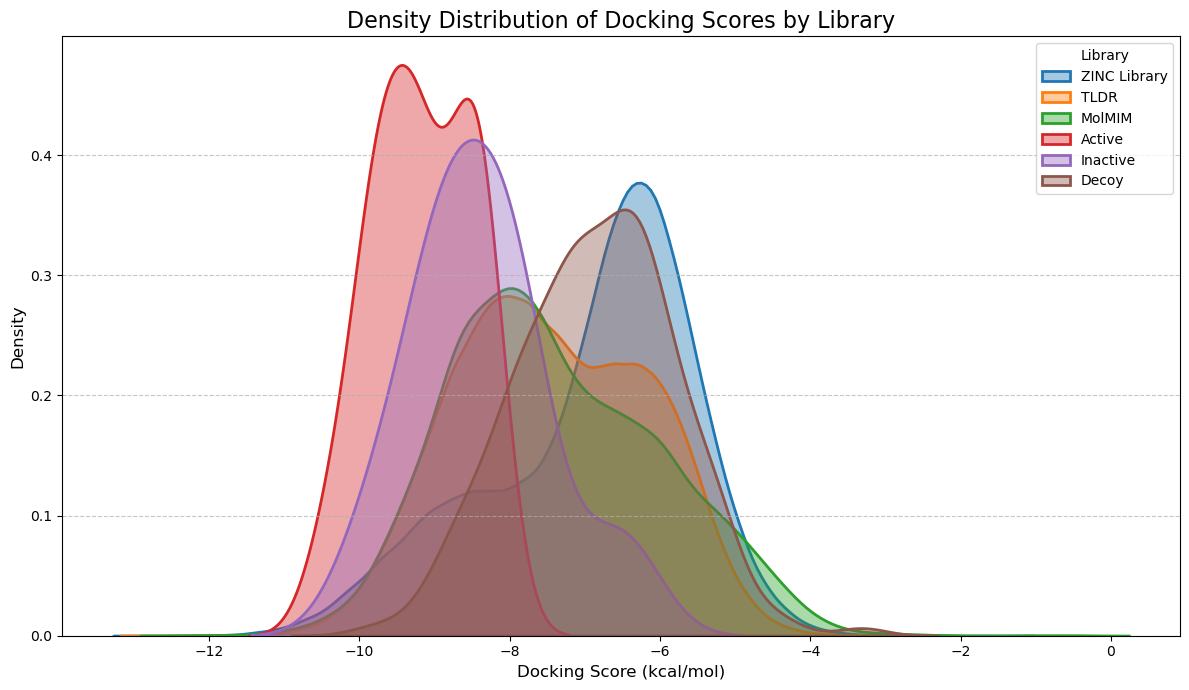

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'combined_1m' is your DataFrame
# combined_1m = pd.read_csv('your_data_file.csv')

# --- Start of new plotting code ---

plt.figure(figsize=(12, 7))

# Get the list of unique labels to plot
unique_labels = combined_1m['Label'].unique()

# Loop through each label and plot its KDE
for label in unique_labels:
    # Select the data for the current label
    subset = combined_1m[combined_1m['Label'] == label]
    
    # Plot the distribution for this subset, giving it a label for the legend
    sns.kdeplot(
        subset['Affinity_kcal_per_mol'], 
        label=label,  # This is the key part for the legend
        fill=True, 
        alpha=0.4, 
        linewidth=2
    )

# --- End of new plotting code ---

# Add titles and labels
plt.title('Density Distribution of Docking Scores by Library', fontsize=16)
plt.xlabel('Docking Score (kcal/mol)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Create the legend that maps colors to labels
plt.legend(title='Library') 

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

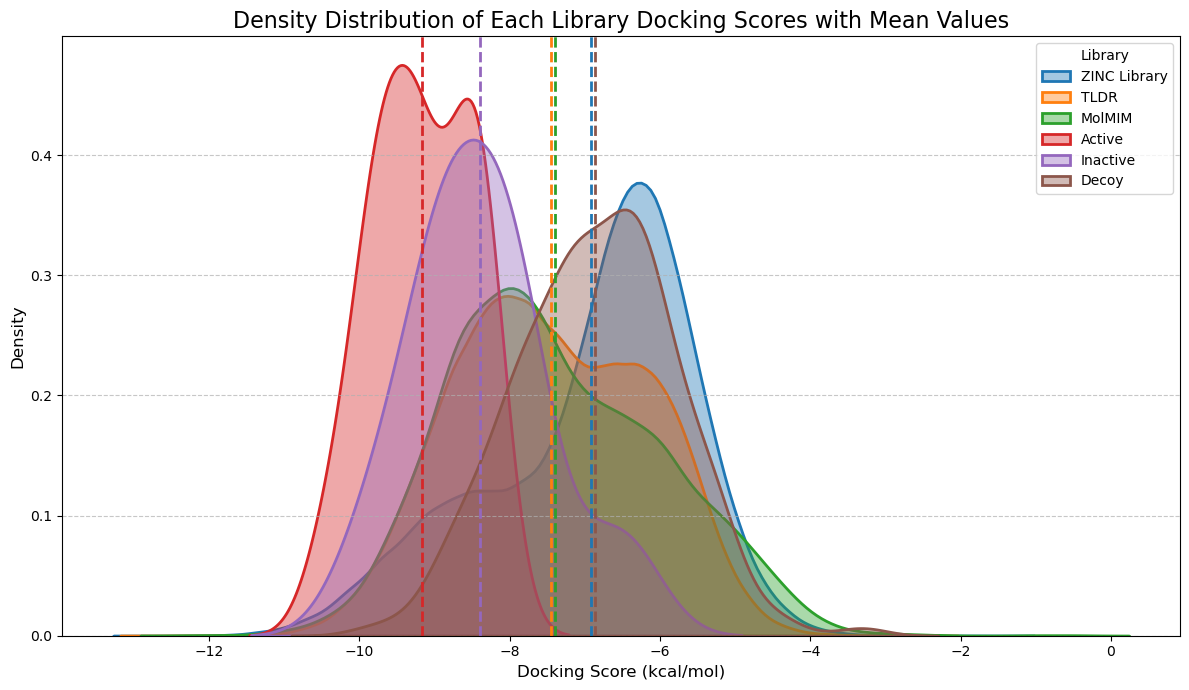

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'combined_1m' is your DataFrame
# combined_1m = pd.read_csv('your_data_file.csv')

plt.figure(figsize=(12, 7))

# Get the list of unique labels and a color palette
unique_labels = combined_1m['Label'].unique()
palette = sns.color_palette("tab10", len(unique_labels))

# Loop through each label to plot it and its mean line
for i, label in enumerate(unique_labels):
    # Select the data for the current label
    subset = combined_1m[combined_1m['Label'] == label]
    
    # Use the color from our palette
    color = palette[i]
    
    # Plot the distribution for this subset
    sns.kdeplot(
        subset['Affinity_kcal_per_mol'], 
        label=label,
        color=color,
        fill=True, 
        alpha=0.4, 
        linewidth=2
    )
    
    # --- START: New code to add the mean line ---
    
    # 1. Calculate the mean for the current subset
    mean_value = subset['Affinity_kcal_per_mol'].mean()
    
    # 2. Draw a vertical dashed line at the mean
    plt.axvline(
        x=mean_value, 
        color=color, 
        linestyle='--', 
        linewidth=2
    )
    
    # --- END: New code ---

# Add titles and labels
plt.title('Density Distribution of Each Library Docking Scores with Mean Values', fontsize=16)
plt.xlabel('Docking Score (kcal/mol)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Create the legend that maps colors to labels
plt.legend(title='Library') 

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

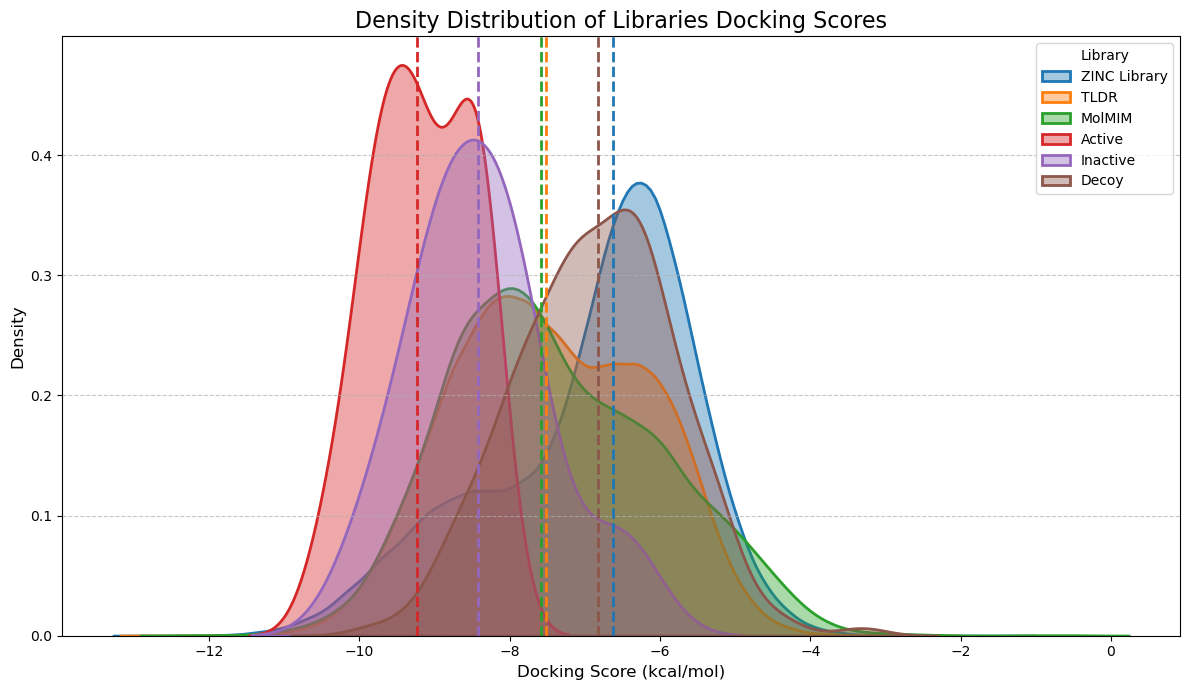

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'combined_1m' is your DataFrame
# combined_1m = pd.read_csv('your_data_file.csv')

plt.figure(figsize=(12, 7))

# Get the list of unique labels and a color palette
unique_labels = combined_1m['Label'].unique()
palette = sns.color_palette("tab10", len(unique_labels))

# Loop through each label to plot it and its median line
for i, label in enumerate(unique_labels):
    subset = combined_1m[combined_1m['Label'] == label]
    color = palette[i]
    
    sns.kdeplot(
        subset['Affinity_kcal_per_mol'], 
        label=label,
        color=color,
        fill=True, 
        alpha=0.4, 
        linewidth=2
    )
    
    # --- This is the only part that changed ---
    
    # 1. Calculate the MEDIAN for the current subset
    median_value = subset['Affinity_kcal_per_mol'].median()
    
    # 2. Draw a vertical dashed line at the median
    plt.axvline(
        x=median_value, 
        color=color, 
        linestyle='--', 
        linewidth=2
    )
    # --- End of change ---

# Update title to reflect the change to median
plt.title('Density Distribution of Libraries Docking Scores', fontsize=16)
plt.xlabel('Docking Score (kcal/mol)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Library') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()